We want to compare two impulse sequences to see how 'close' they are.

We don't care about normalization because we actually want a longer sequence to be 'more similar' to itself than a shorter sequence

In [3]:
%matplotlib inline

import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

In [4]:
WINDOW_LEN = 9.0

In [5]:
# do it dum first
dx = [5.0,4.0,10.0,20.0,30.0,20.0,5.0,4.0,10.0,20.0,30.0,20.0,5.0,4.0]
x = np.cumsum(dx)
x

array([  5.,   9.,  19.,  39.,  69.,  89.,  94.,  98., 108., 128., 158.,
       178., 183., 187.])

In [6]:
# Greatest Lower Bound Index
# returns the index of the largest value in xs that is <= v
# xs must be sorted ascending
#
# if v is < xs[0], then return -1
#
# TODO: make this a binary search
def glbi(xs, v):
    for i in range(len(xs)):
        assert(i == 0 or xs[i - 1] <= xs[i])
        if(xs[i] > v):
            assert(i == 0 or x[i-1] <= v)
            assert(i == len(xs) or xs[i] > v)
            return i - 1
    return len(xs) - 1


In [7]:
# Test glbi

def testpoints_gen(xs):
    for i in range(len(xs)):
        yield xs[i]
        if(i != len(xs) - 1):
            yield (xs[i] + xs[i + 1])/2

# Each element in x twice
stutter = lambda x: [j for k in [[i, i] for i in x] for j in k ]            
            
testpoints = [x[0] - 1] + list(testpoints_gen(x)) + [x[-1] + 1]
test_answers = [-1] + list(stutter(range(0, len(x))))

answered = [glbi(x, v) for v in testpoints]

assert(answered == test_answers)

## objective function

$$ f(v, w) = max(0, 1 - \frac{2 | v - w | }{ WINDOW\_LEN}) $$

In [8]:
def f(v, w):
    return max(0, 1 - 2 * np.abs(v - w) / WINDOW_LEN)

## The Product

In [9]:
# For each point in the shifted sequence, get all points in the 
# original sequence within the window. Then take the sum of the 
# objective function between the shifted point and all the original 
# points in its window
#
#   *  *     * *    * **       Original sequence
#      +     + +               Points pairs summed
#    |     V     |             Window for shifted point
#       *  *     * *    * **   Shifted sequence
def self_product_shift(x, shift):
    product = 0
    #print("shift: {}".format(shift))
    for i in range(len(x)):
        v = x[i] + shift
        #print("i: {}".format(i))
        #print("v: {}".format(v))
        
        lbi = glbi(x,v - WINDOW_LEN/2) + 1
        lbi = min(max(0, lbi), len(x) - 1)
        
        #print("lbi: {}".format(lbi))
        #print("x[lbi]: {}".format(x[lbi]))
        
        assert(lbi == len(x) - 1 or x[lbi] >= v - WINDOW_LEN/2)
        assert(lbi == 0 or x[lbi - 1] <= v - WINDOW_LEN/2)

        ubi = glbi(x, v + WINDOW_LEN/2) + 1
        ubi = min(len(x) - 1, ubi)
        
        #print("ubi: {}".format(ubi))
        #print("x[ubi]: {}".format(x[ubi]))
        
        assert(ubi == 0 or x[ubi-1] <= v + WINDOW_LEN/2)
        assert(ubi == len(x) - 1 or x[ubi] > v + WINDOW_LEN/2)

        point_product = 0
        for j in range(lbi, min(len(x) - 1, ubi)):
            if(j == i):
                continue
            assert(f(v, x[j]) >= 0) 
            #print("f(x[{}], x[{}] == {}".format(v, x[j], f(v, x[j])))
            point_product = point_product + f(v, x[j])


        product = product + point_product
        #print("product: {}".format(product))
    return product

In [10]:
# shifted_signal = signal + shift
shift = 4
self_product_shift(x, 10)

3.0

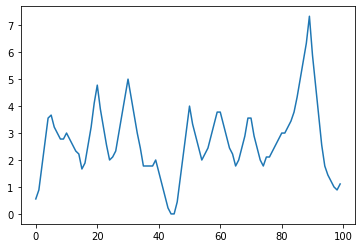

In [12]:
products = [self_product_shift(x, shift) for shift in range(100)]

["{} : {}".format(shift, self_product_shift(x, shift)) for shift in range(100)]
 
    
plt.plot(range(100), products)

The spike (at 93 I think) is the one we want